## Install Segment Anything and add helper functions

In [ ]:
!pip install -e .

In [24]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [25]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

## Get mask from a specific point in the image

In [26]:
import cv2
import numpy as np
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/notebooks/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
image = cv2.imread('''/notebooks/39eba0b35fec815252e3f24b3888e118.jpg''')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

input_point = np.array([[500, 375]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)


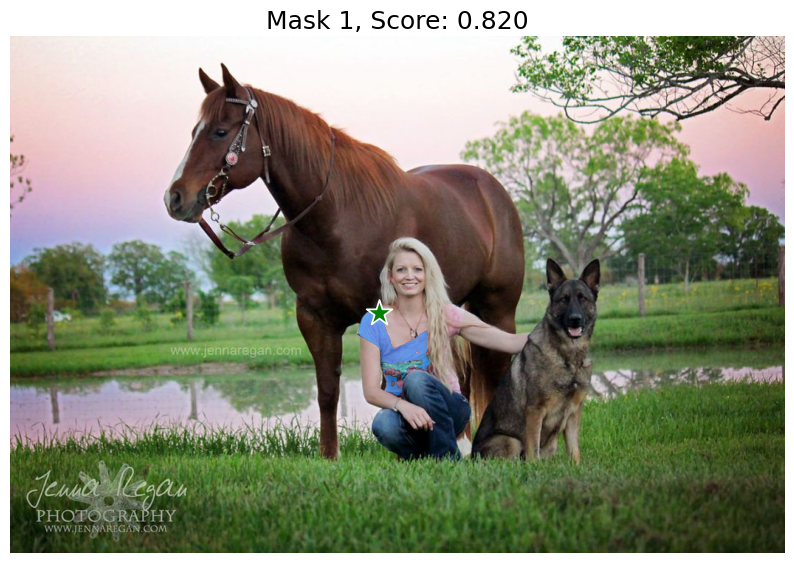

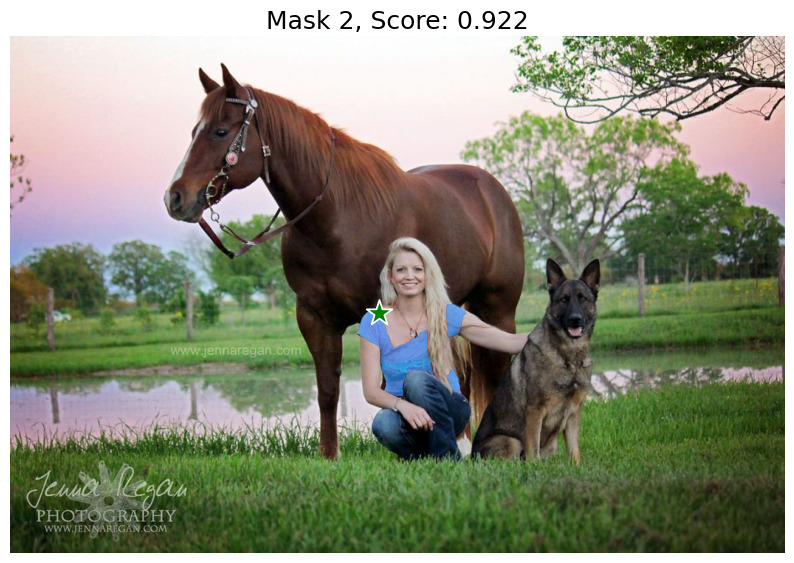

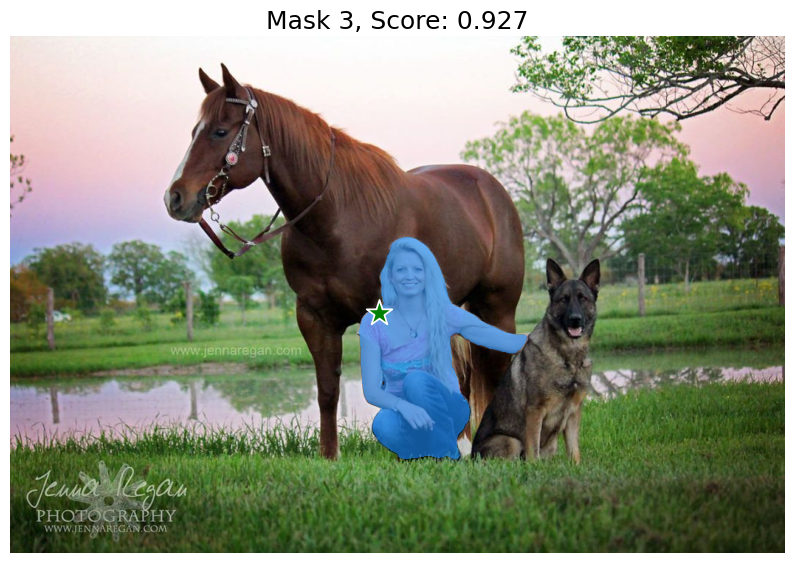

In [27]:
# Print out each of the masks overlaid on the original image

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  





## Get all possible masks from image

In [28]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
sam = sam_model_registry["vit_h"](checkpoint="/notebooks/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
i = cv2.imread('''/notebooks/39eba0b35fec815252e3f24b3888e118.jpg''')
masks = mask_generator.generate(i)

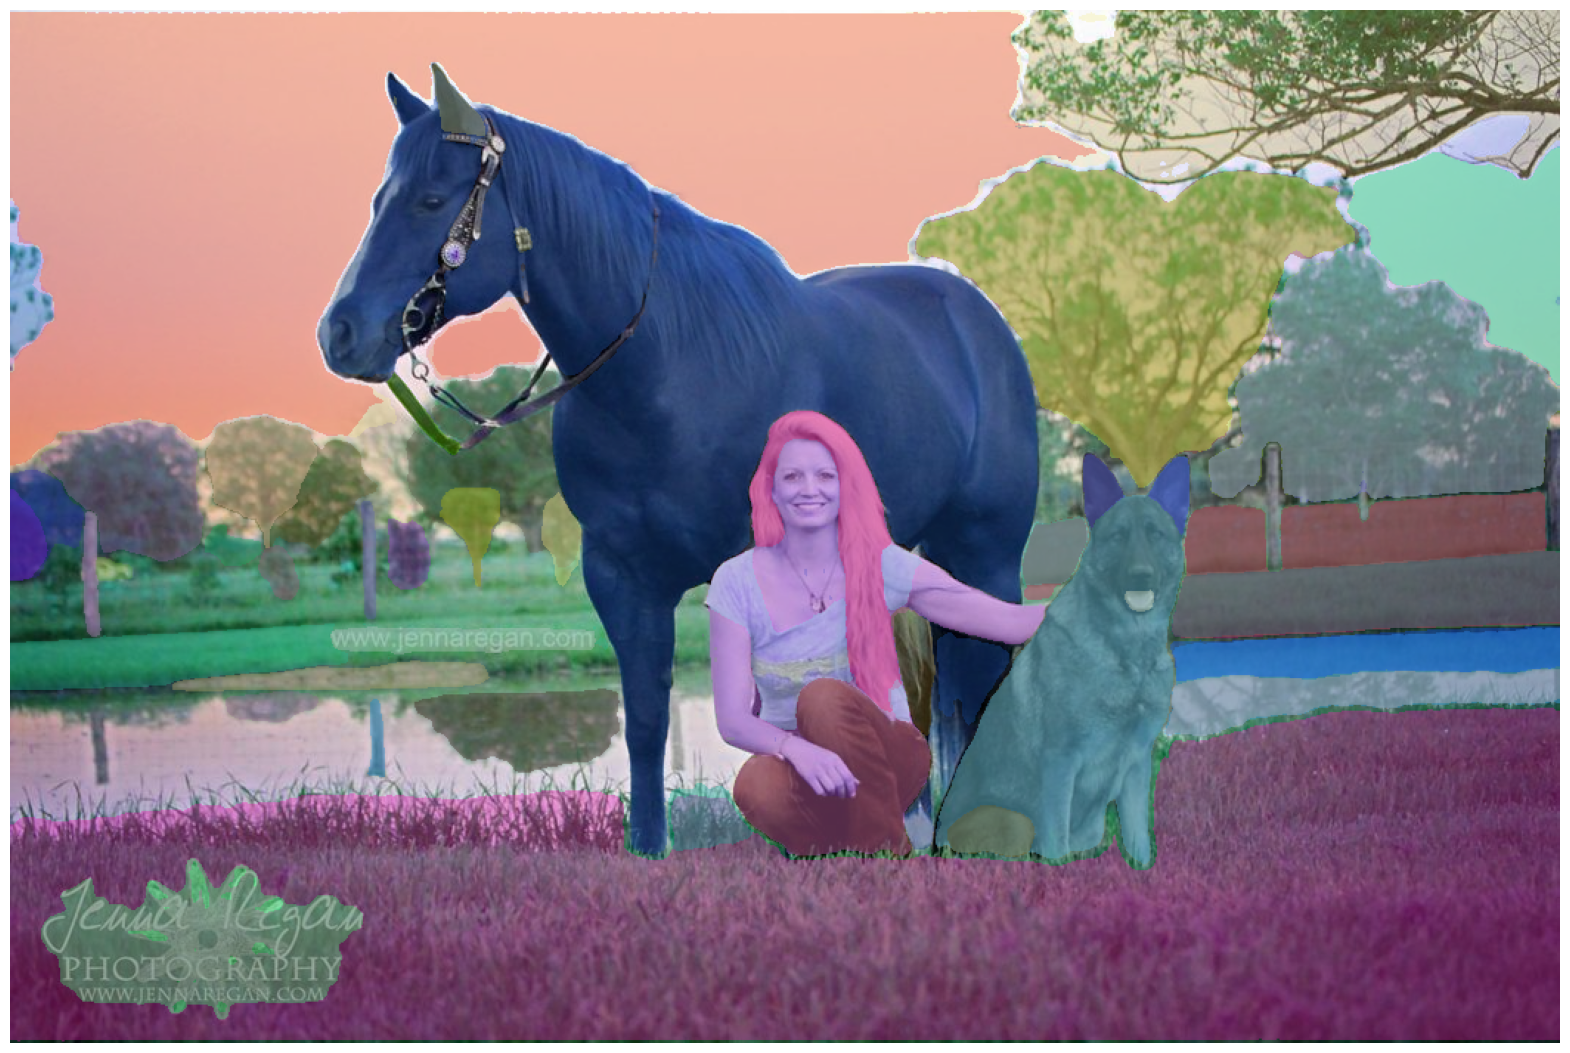

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))



plt.figure(figsize=(20,20))
plt.imshow(i)
show_anns(masks)
plt.axis('off')
plt.show() 

